In [1]:
# Handle table-like data and matrices :
import numpy as np
import pandas as pd
import seaborn as sns

# Modelling Algorithms
from sklearn.model_selection import train_test_split
from sklearn import linear_model 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor


# visualization
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# 데이터 로드
df = sns.load_dataset("diamonds")
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


### 데이터의 컬럼

- carat   : 다이아몬드의 무게(0.2--5.01)
- cut     : 절단 품질(Fair, Good, Very Good, Premium, Ideal)
- color   : J(최악)에서 D(최고)까지의 다이아몬드 색상
- clarity : 다이아몬드가 얼마나 깨끗한 지 측정 (I1 (최악), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (최고)) - 투명도
- x       : mm 단위의 길이 (0-10.74)
- y       : 폭 (mm) (0-58.9)
- z       : mm 단위의 깊이 (0-31.8)
- depth   : 총 깊이 백분율 = z / 평균 (x, y) = 2 * z / (x + y) (43--79)
- tabel   : 가장 넓은 지점 (43--95)을 기준으로 다이아몬드 상단 너비

### 다이아몬드 캐럿
1캐럿(1ct) = 0.2g

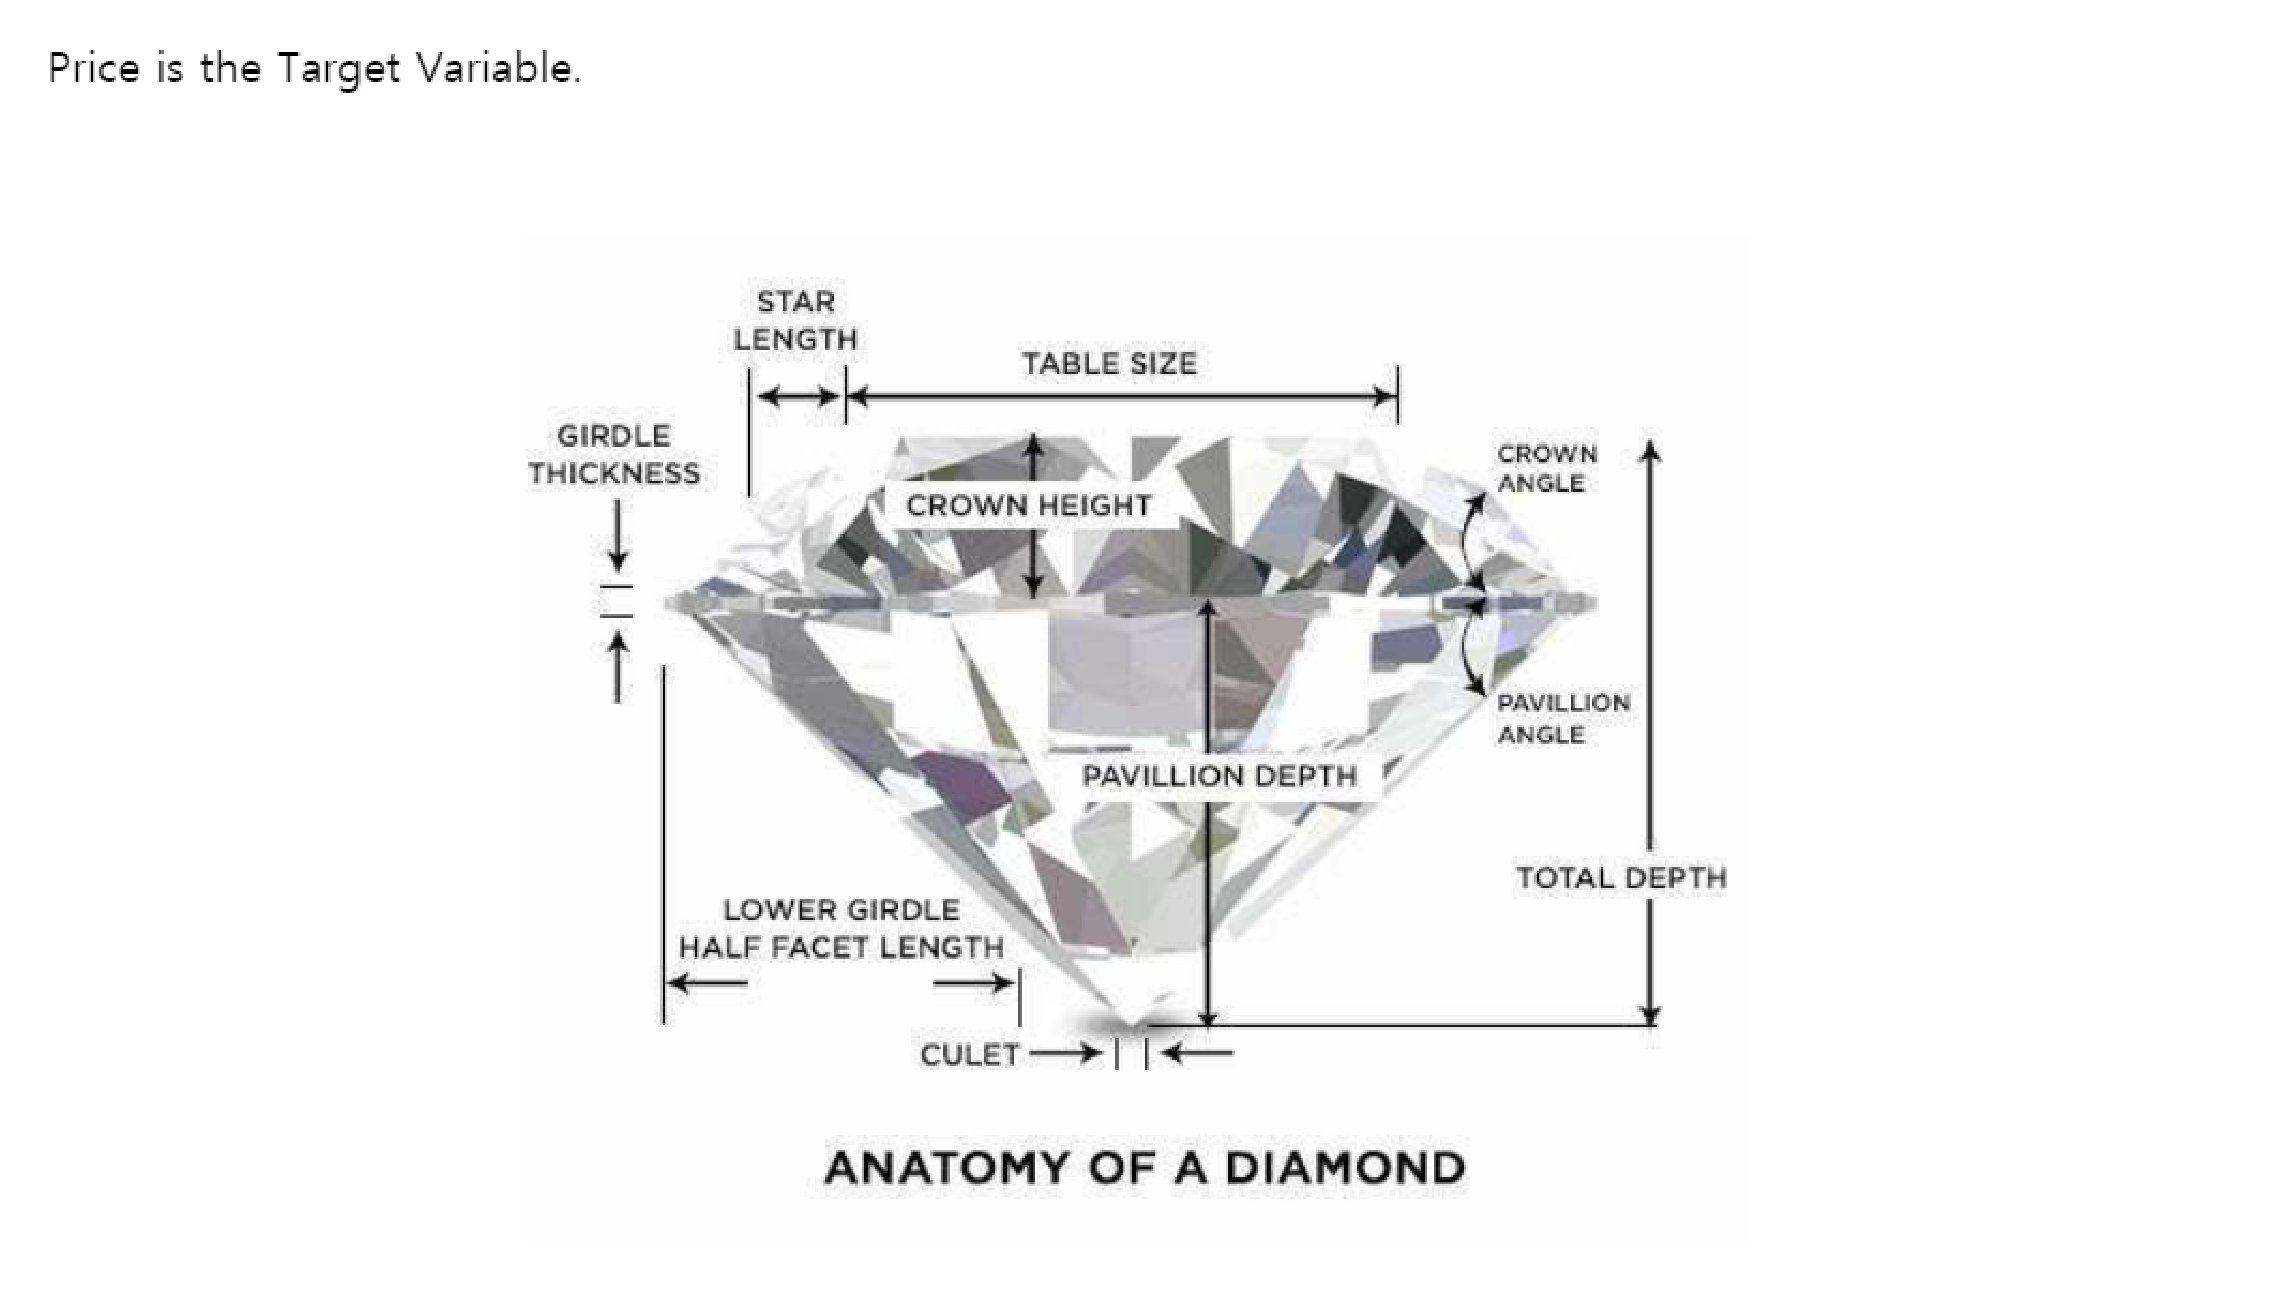

In [3]:
import cv2

fname = 'picture/Diamond.png'

image = cv2.imread(fname, cv2.IMREAD_COLOR)

b, g, r = cv2.split(image)
image2 =cv2.merge([r,g,b])

plt.figure(figsize=(20, 20))
plt.imshow(image2)
plt.xticks([]) 
plt.yticks([]) 
plt.show()

In [4]:
# null값 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
carat      53940 non-null float64
cut        53940 non-null object
color      53940 non-null object
clarity    53940 non-null object
depth      53940 non-null float64
table      53940 non-null float64
price      53940 non-null int64
x          53940 non-null float64
y          53940 non-null float64
z          53940 non-null float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [5]:
# null값 확인
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [6]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [8]:
df.loc[(df['x']==0) | (df['y']==0) | (df['z']==0)]

,carat,cut,color,clarity,depth,table,price,x,y,z
2207,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.0
2314,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,0.0
4791,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.0
5471,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.0
10167,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.0
11182,1.07,Ideal,F,SI2,61.6,56.0,4954,0.00,6.62,0.0
11963,1.00,Very Good,H,VS2,63.3,53.0,5139,0.00,0.00,0.0
13601,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,0.0
15951,1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.00,0.0
24394,2.18,Premium,H,SI2,59.4,61.0,12631,8.49,8.45,0.0


In [7]:
len(df.loc[(df['x']==0) | (df['y']==0) | (df['z']==0)])

20

In [8]:
# 제거
df = df[(df[['x','y','z']] != 0).all(axis=1)]

In [9]:
# 제거 확인
df.loc[(df['x']==0) | (df['y']==0) | (df['z']==0)]

,carat,cut,color,clarity,depth,table,price,x,y,z


#### Correlation Between Features

C:\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1241: UserWarning: findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
C:\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1241: UserWarning: findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


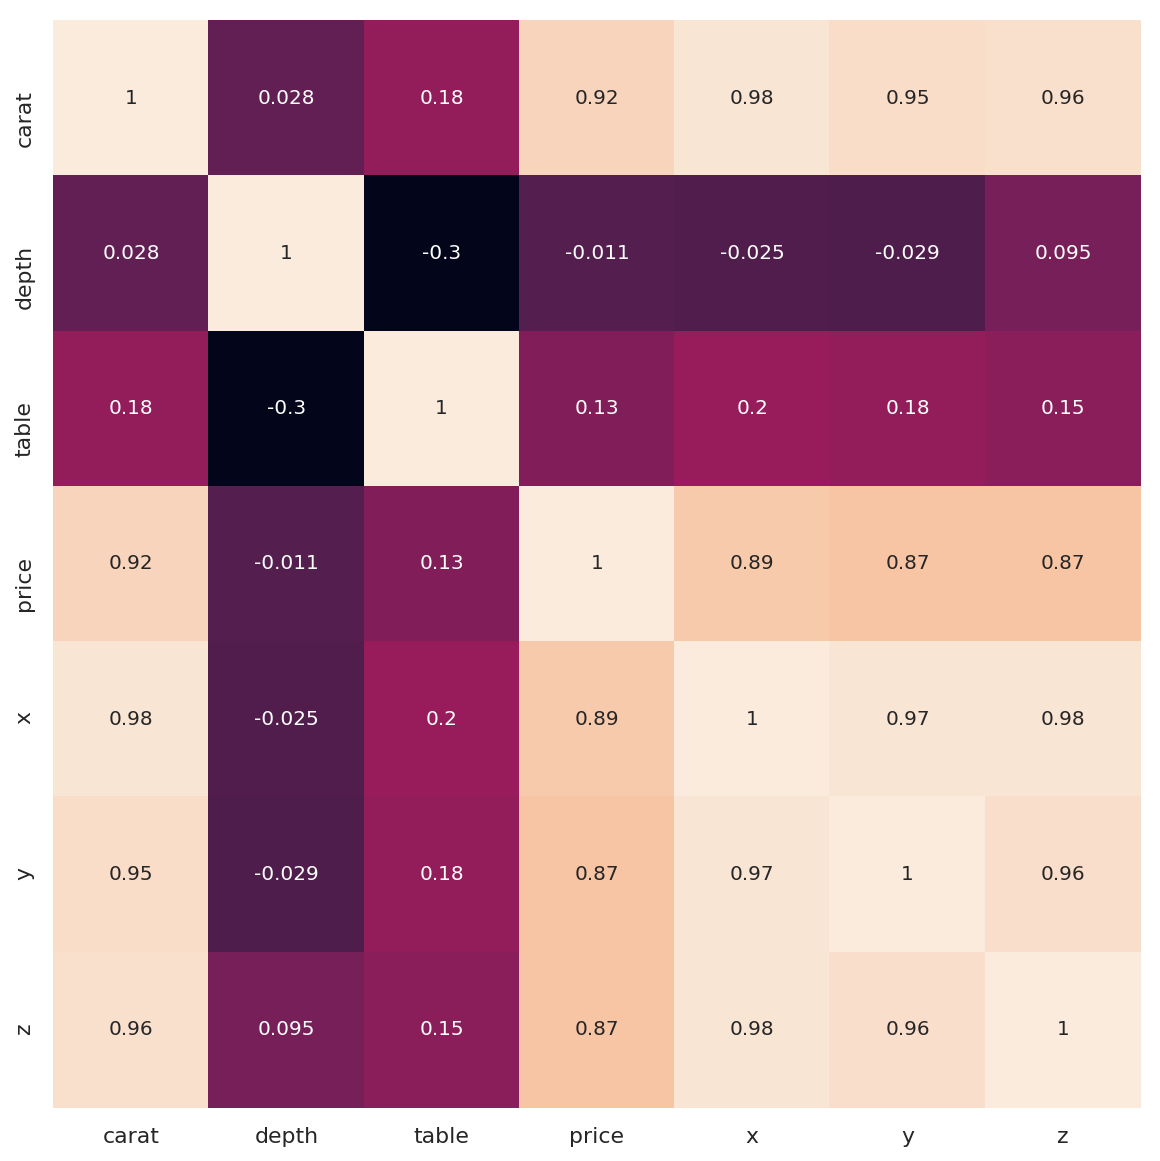

In [10]:
corr = df.corr()
plt.figure(figsize = (10, 10))
sns.heatmap(data=corr, square=True , annot=True, cbar=False)
plt.show()

- 1. depth와 table은 가격이나 다른 변수와 큰 상관관계가 없다. 

- 2. 다이아몬드 가격은 특히 캐럿과 크기(x,y,x)와 밀접한 관련이 있습니다.

- 3. 캐럿은 가격에 큰 영향을 미칩니다.    

### Carat
- 1캐럿(1ct) = 0.2g

1. 어원 : 캐럿은 사실 콩과 비슷하게 생긴 캐럽 나무의 열매. 다이아몬드의 무게를 측정하는 데 사용되고 있습니다.            
2. 큰 다이아몬드 일수록 희소성이 있기 때문에 2캐럿 다이아몬드가 동일한 품    질의 1캐럿 다이아몬드 2개보다 비쌉니다.

C:\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1241: UserWarning: findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


피어슨 상관관계 :  0.92


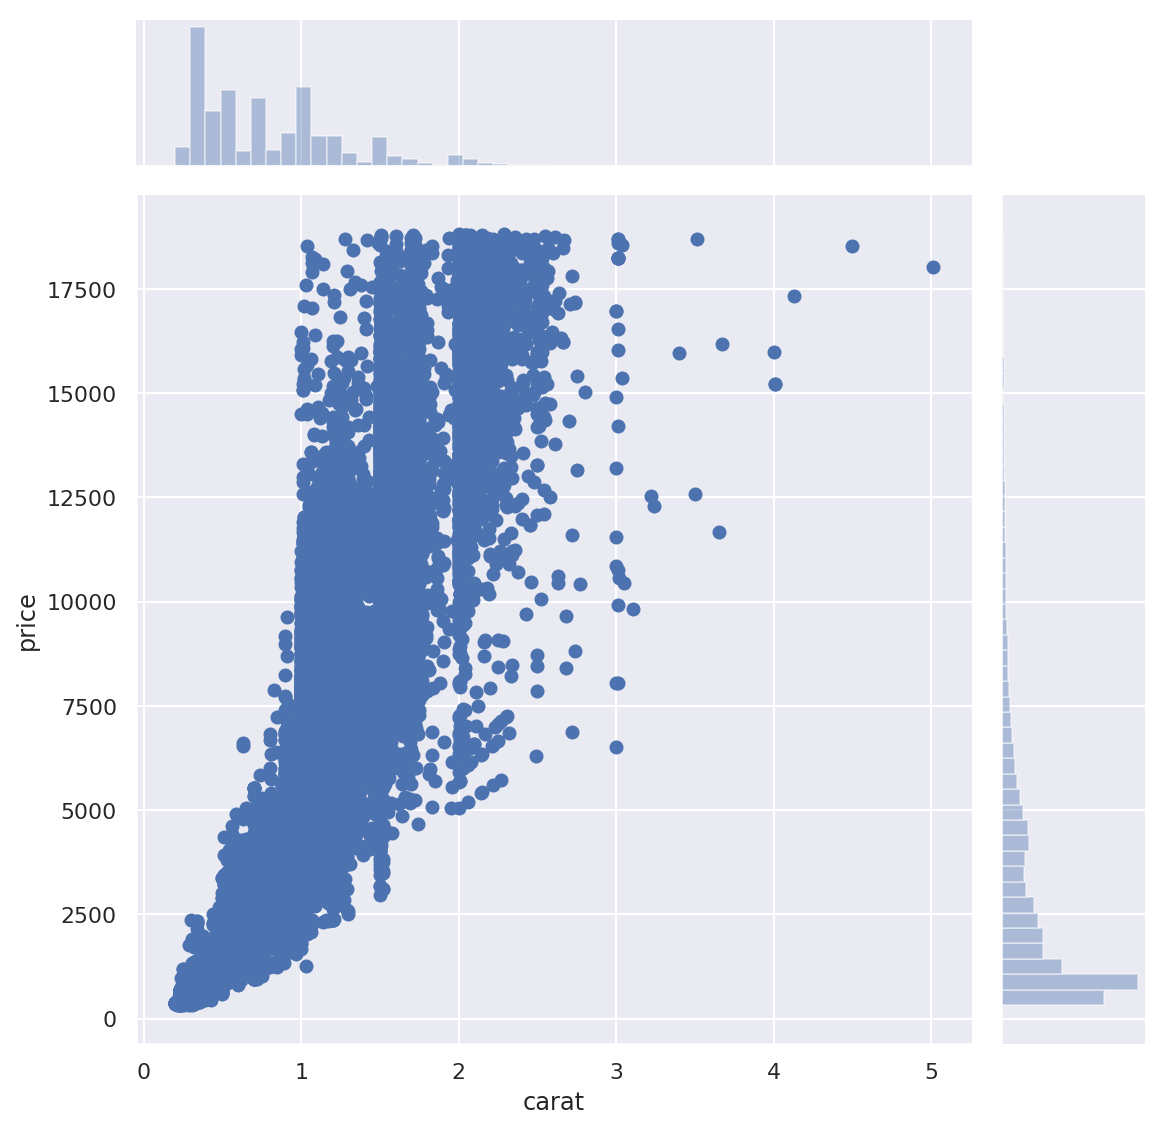

In [11]:
sns.jointplot(x='carat' , y='price' , data=df , size=8)
print("피어슨 상관관계 : ", round(sp.stats.pearsonr(df.carat, df.price)[0], 2))
plt.show()

### Cut
- 커팅 등급 순서 -> Poor, Fair, Good, Very Good, Premium, Ideal

1. 커팅도 다이아몬드의 가치를 크게 증가 시키거나 감소시킬 수 있습니다.
2. 커팅 품질이 높을수록 캐럿 당 다이아몬드 가격이 증가합니다.
3. 커팅 즉, 연마등급은 얼마만큼 정교하게 빛이 가장 잘 반사가 되는지의 정도.

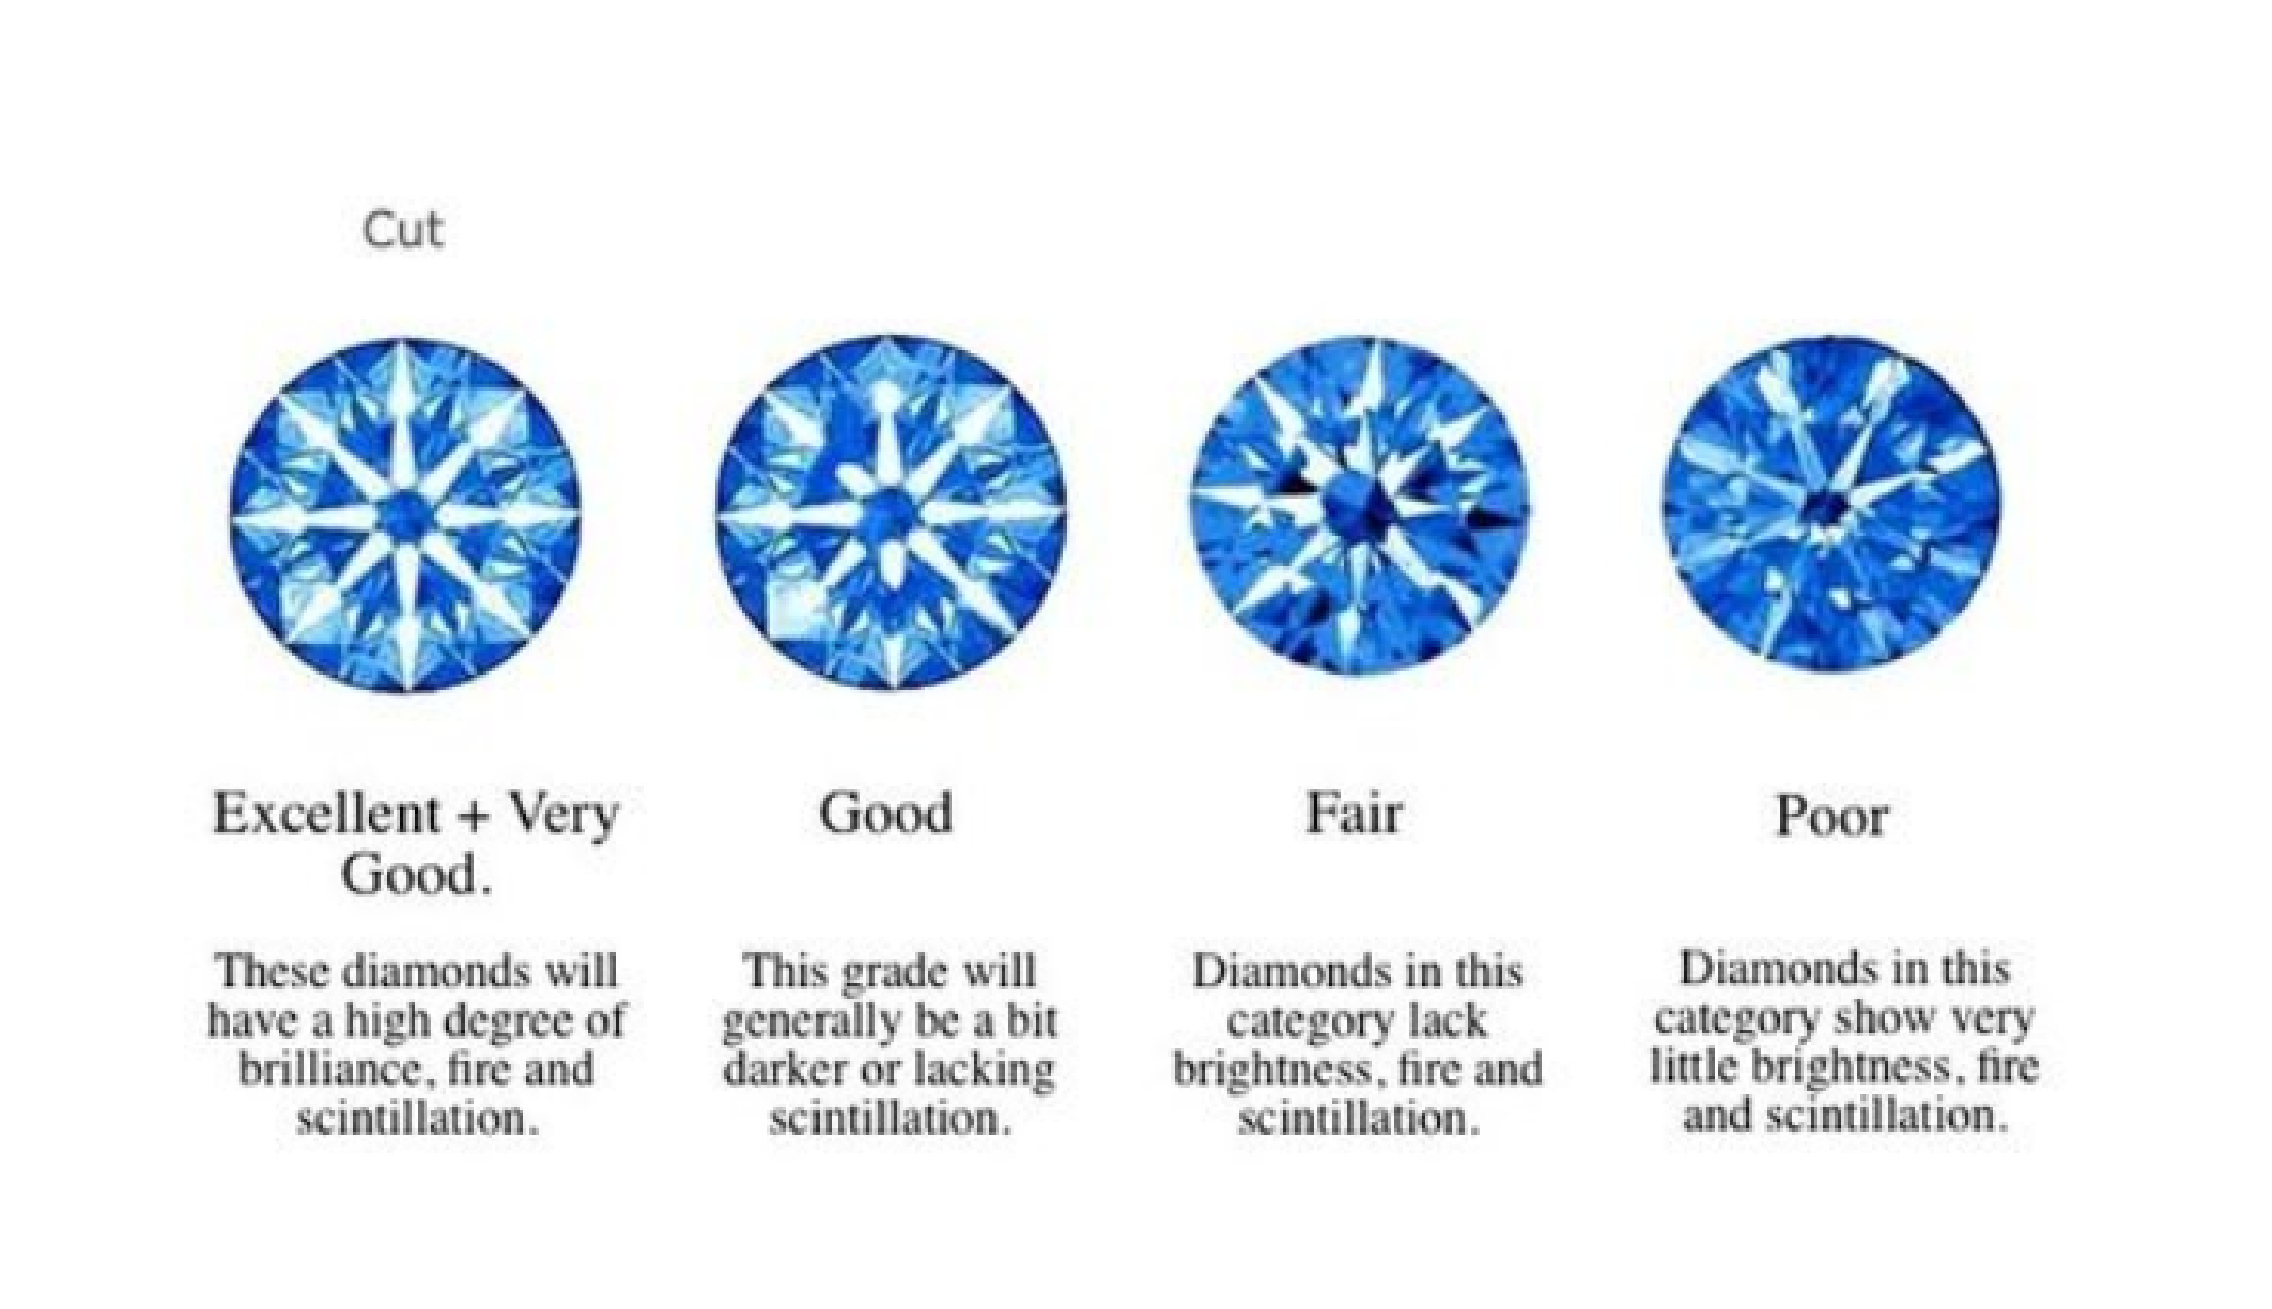

In [12]:
fname = 'picture/Diamond_Cut.png'

image = cv2.imread(fname, cv2.IMREAD_COLOR)

b, g, r = cv2.split(image)
image2 =cv2.merge([r,g,b])

plt.figure(figsize=(20, 20))
plt.imshow(image2)
plt.xticks([]) 
plt.yticks([]) 
plt.show()

C:\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


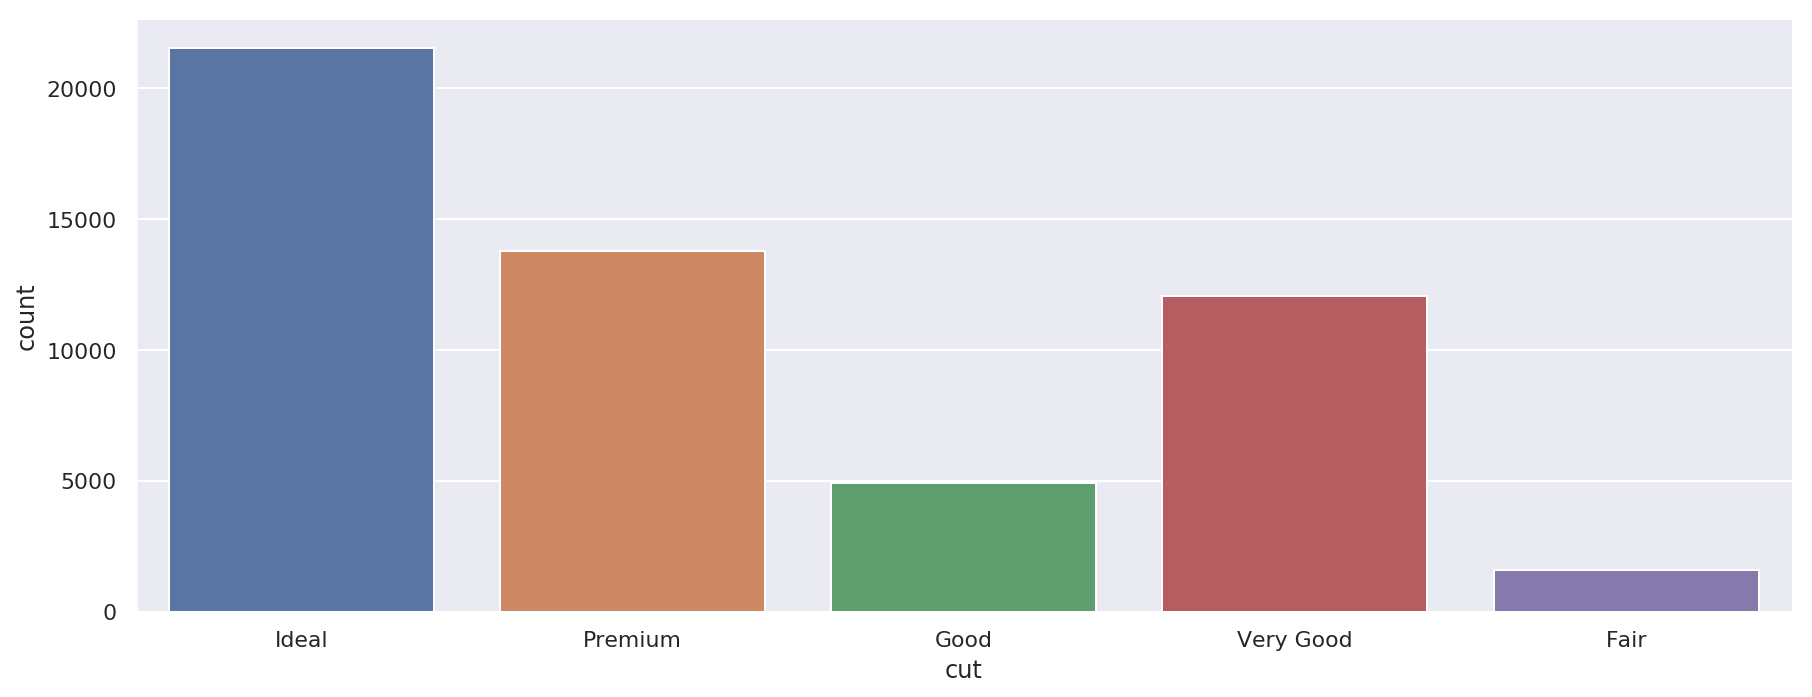

In [13]:
sns.factorplot(x='cut', data=df , kind='count',aspect=2.5 )
plt.show()

C:\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


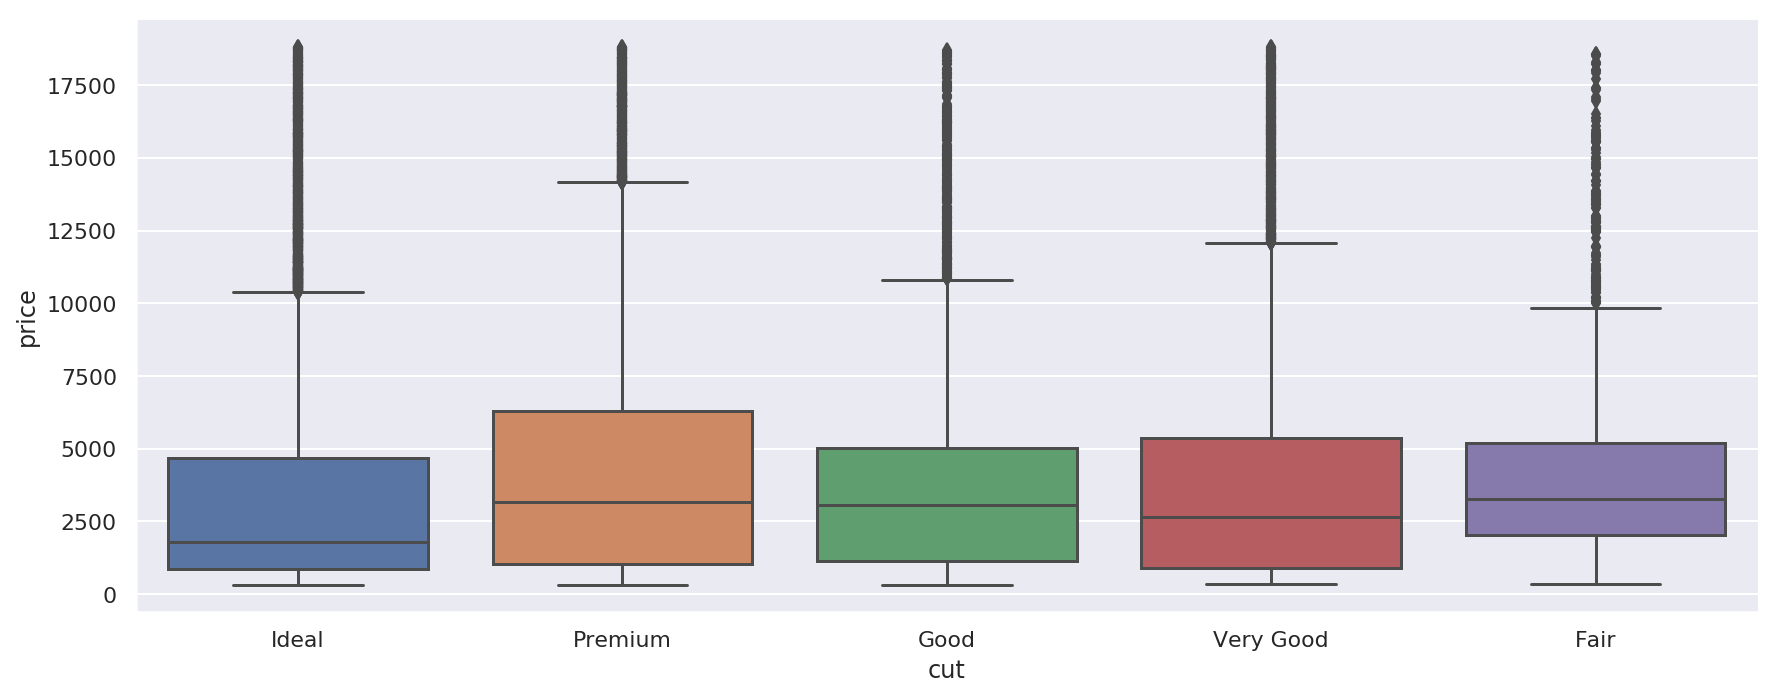

In [14]:
sns.factorplot(x='cut', y='price', data=df, kind='box' ,aspect=2.5 )
plt.show()

### Color

1. 다이아몬드의 색상은 색상의 색조 및 채도 또는 다이아몬드의 색상 깊이를    나타냅니다.
2. 다이아몬드는 노란색 또는 희미한 갈색에서 무색까지의 스펙트럼을 보입니    다. 

- J(최악)에서 D(최고)까지의 범주. D범주에 가까울 수록 무색을 띰.
- <J 아래단계의 등급은 사실상 유통은 되지 않음. 시장가치가 없으므로>
- 실질적으로 다이아몬드는 D,E,F등급이 선호도가 가장 높음.

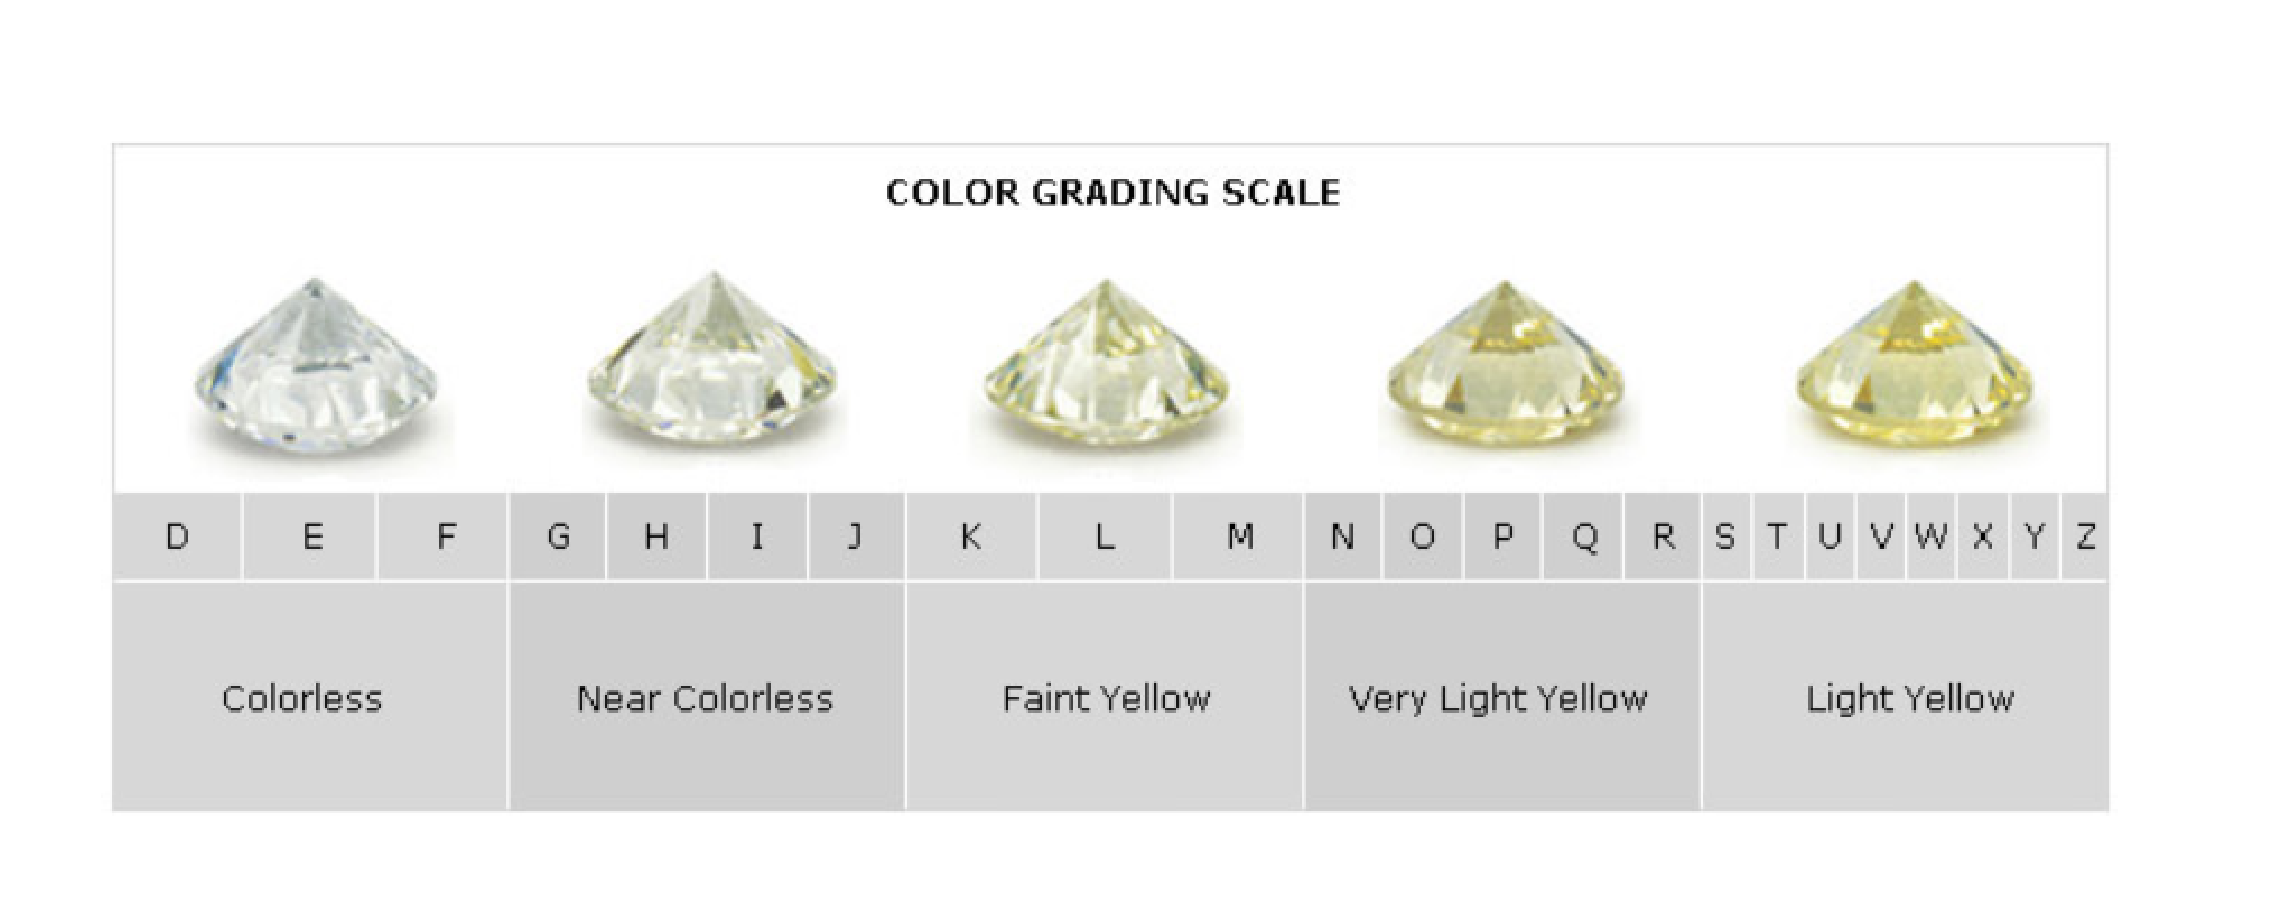

In [15]:
fname = 'picture/Diamond_Color.png'

image = cv2.imread(fname, cv2.IMREAD_COLOR)

b, g, r = cv2.split(image)
image2 =cv2.merge([r,g,b])

plt.figure(figsize=(20, 20))
plt.imshow(image2)
plt.xticks([]) 
plt.yticks([]) 
plt.show()

C:\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


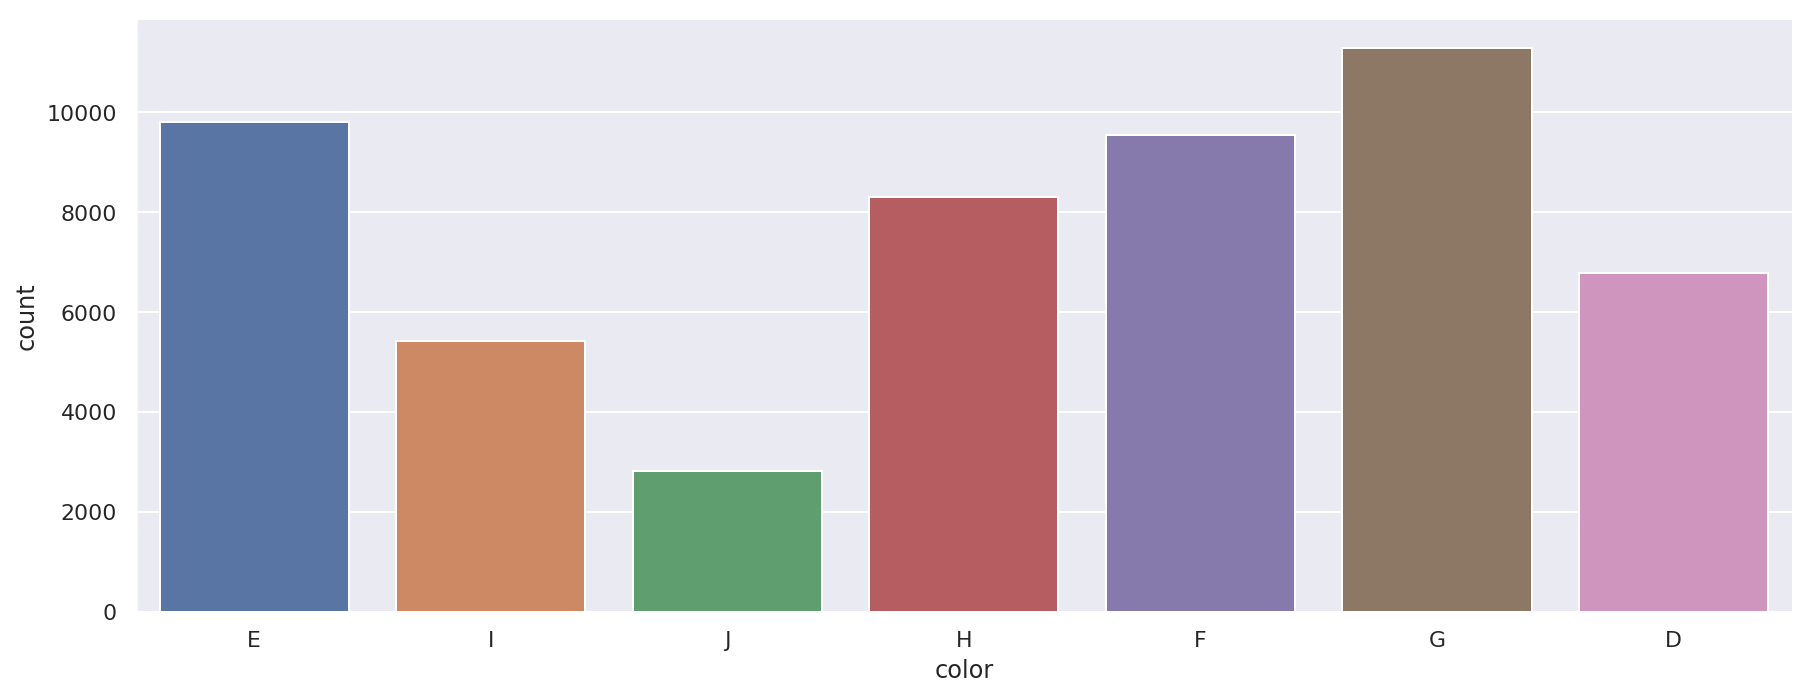

In [16]:
sns.factorplot(x='color', data=df , kind='count',aspect=2.5 )
plt.show()

#### Clarity

- 다이아몬드가 얼마나 깨끗한 지 측정 
- I1 (최악), SI2, SI1, VS2, VS1, VVS2, VVS1, IF, FL (최고) - 투명도

1. 다이아몬드 선명도는 포함 및 결점이 없음을 나타냅니다.
2. 포함은 다이아몬드 내에 위치한 불완전 함입니다. 다이아몬드 내부에 균열    이나 작은 광물 또는 결정과 같은 불순물이 포함된 정도를 나타내는 것.

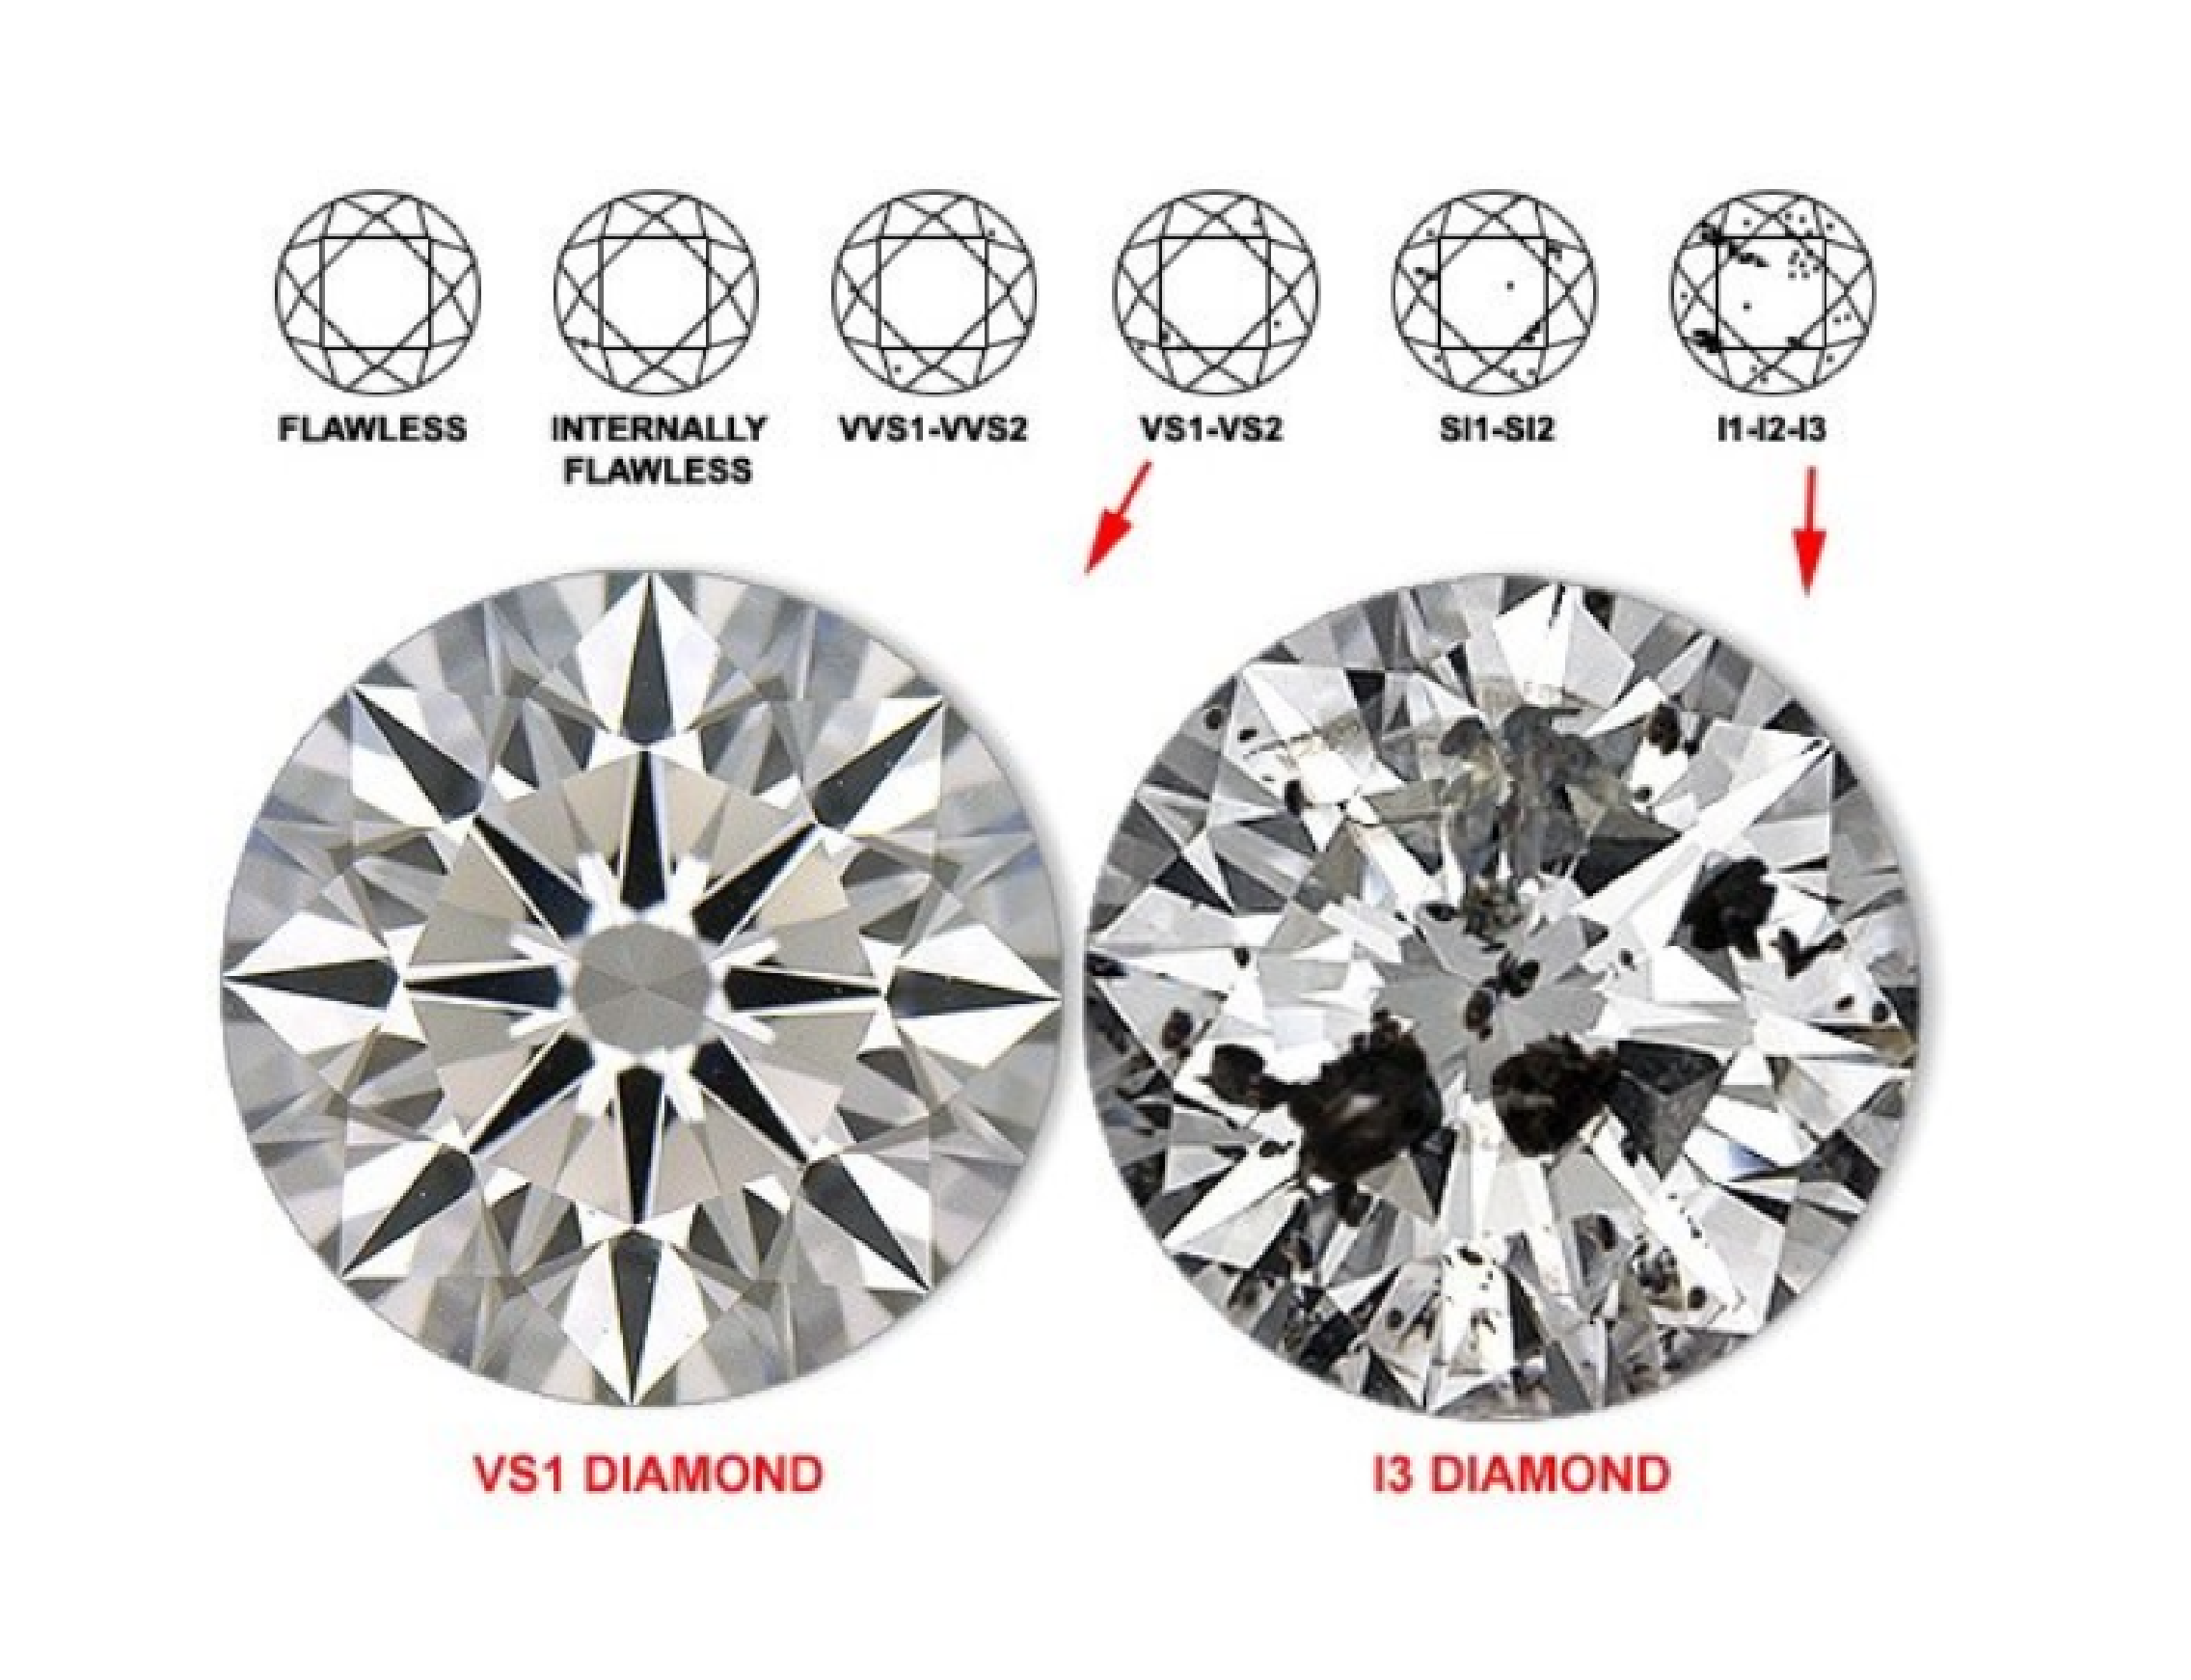

In [17]:
fname = 'picture/Diamond_Clarity.png'

image = cv2.imread(fname, cv2.IMREAD_COLOR)

b, g, r = cv2.split(image)
image2 =cv2.merge([r,g,b])

plt.figure(figsize=(20, 20))
plt.imshow(image2)
plt.xticks([]) 
plt.yticks([]) 
plt.show()

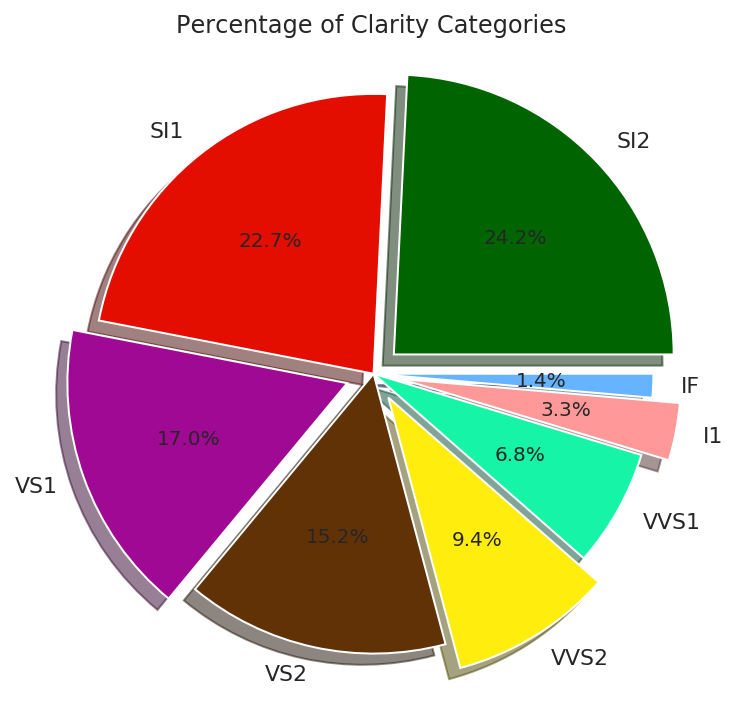

In [25]:
labels = df.clarity.unique().tolist()
sizes = df.clarity.value_counts().tolist()
colors = ['#006400', '#E40E00', '#A00994', '#613205', '#FFED0D', '#16F5A7','#ff9999','#66b3ff']
explode = (0.1, 0.0, 0.1, 0, 0.1, 0, 0.1,0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,autopct='%1.1f%%', shadow=True, startangle=0)
plt.axis('equal')
plt.title("Percentage of Clarity Categories")
plt.plot()
fig=plt.gcf()
fig.set_size_inches(6,6)
plt.show()

VS1,VS2는 실제 시장에서 상당히 높은 마진을 갖는다고 합니다.

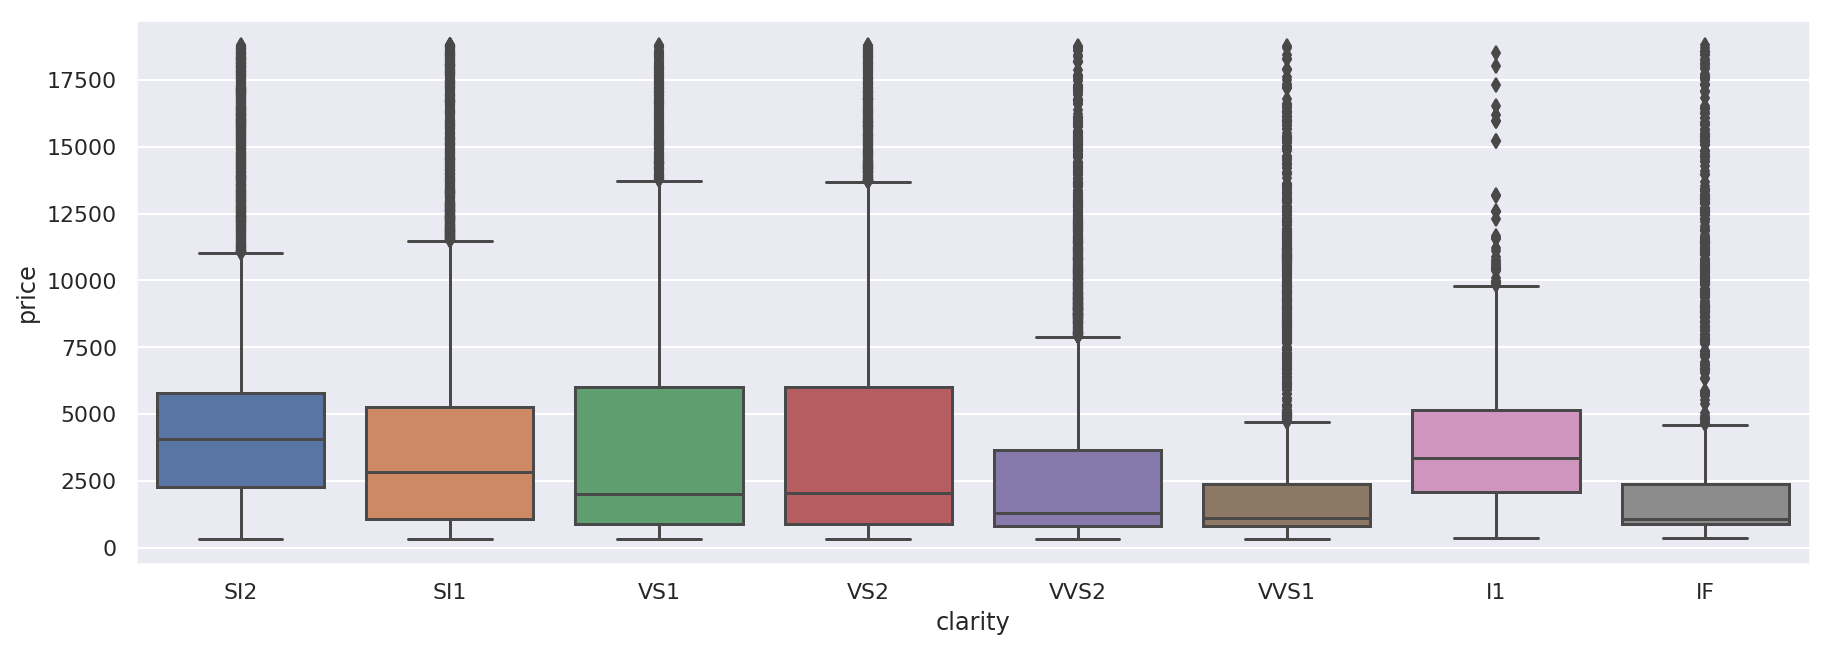

In [27]:
plt.figure(figsize=(15, 5))
sns.boxplot(x='clarity', y='price', data=df )
plt.show()

#### Depth

1. 다이아몬드의 깊이는 Culet에서 테이블까지의 높이 (밀리미터)입니다.
2. 다이아몬드의 깊이 백분율이 너무 크거나 작으면 더 이상 매력적인 양의 빛    을 반환하지 않기 때문에 다이아몬드 모양이 어두워집니다. -> 컷팅과 연관

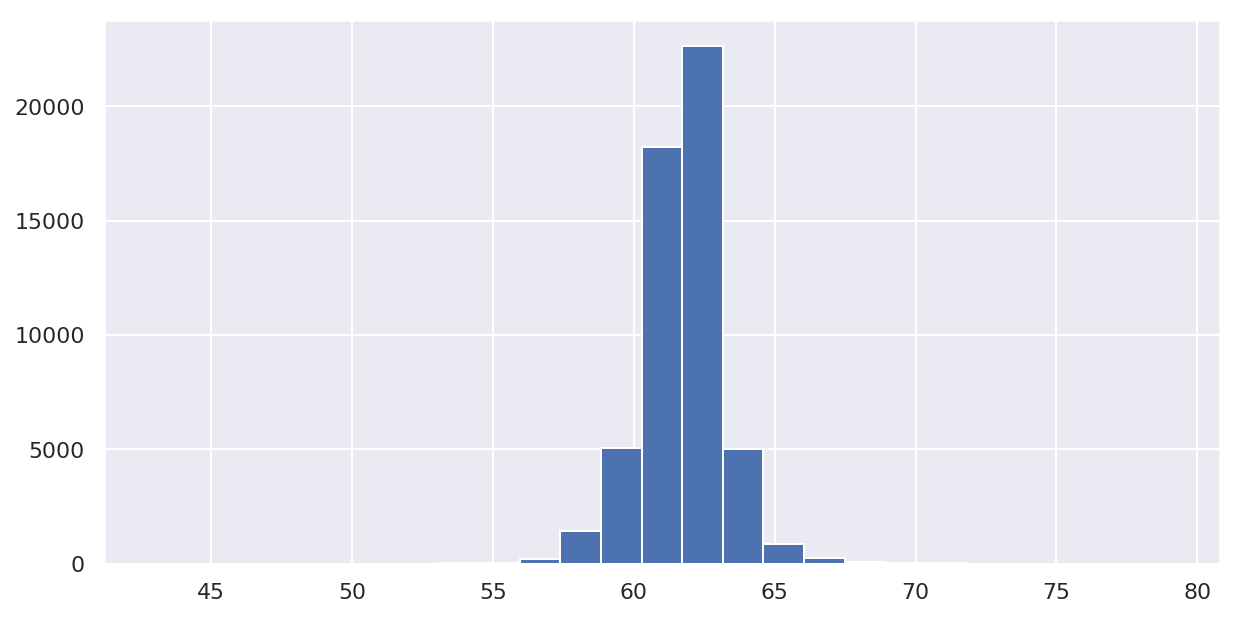

In [18]:
plt.figure(figsize=(10, 5))
plt.hist('depth' , data=df , bins=25)
plt.show()

Depth가 60 ~ 65사이에 많이 분포되어있는 것을 볼수있다.

C:\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


피어슨 상관관계 : -0.011


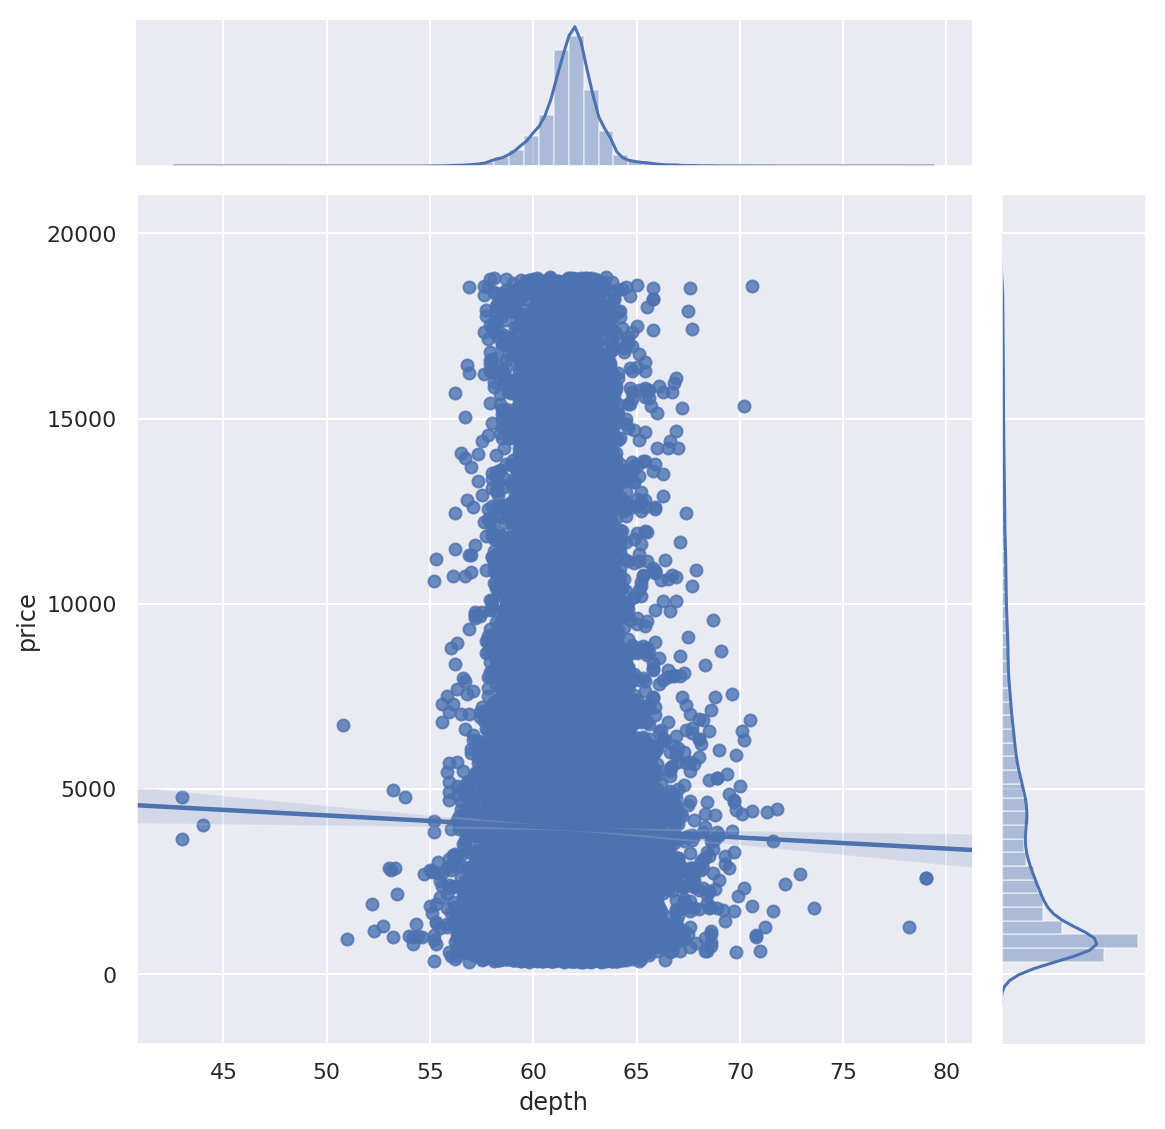

In [28]:
sns.jointplot(x='depth', y='price' , data=df , kind='regplot', size=8)
print("피어슨 상관관계 :", round(sp.stats.pearsonr(df.depth, df.price)[0], 3))
plt.show()

- 우리는 같은 depth여도 가격이 크게 다를 수 있다는 것을 알 수 있습니다
- 즉, 같은 다이아몬드일 때, depth보다는 다른 요인이 더 결정적 요인.
- 이 데이터셋에서 depth는 55에서 65 사이의 값으로 몰려 있기 때문에 결과에 큰 영향을 끼치지 않을 것으로 예상됩니다.

#### Table

1. 테이블은 평균 직경의 백분율로 표시되는 다이아몬드 테이블의 너비입니다.
2. 테이블 (평평한면)이 너무 크면 크라운의 각도 나면에서 빛이 나오지 않고    반짝이는 무지개 색이 만들어지지 않습니다.

C:\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


피어슨 상관관계 :  0.13


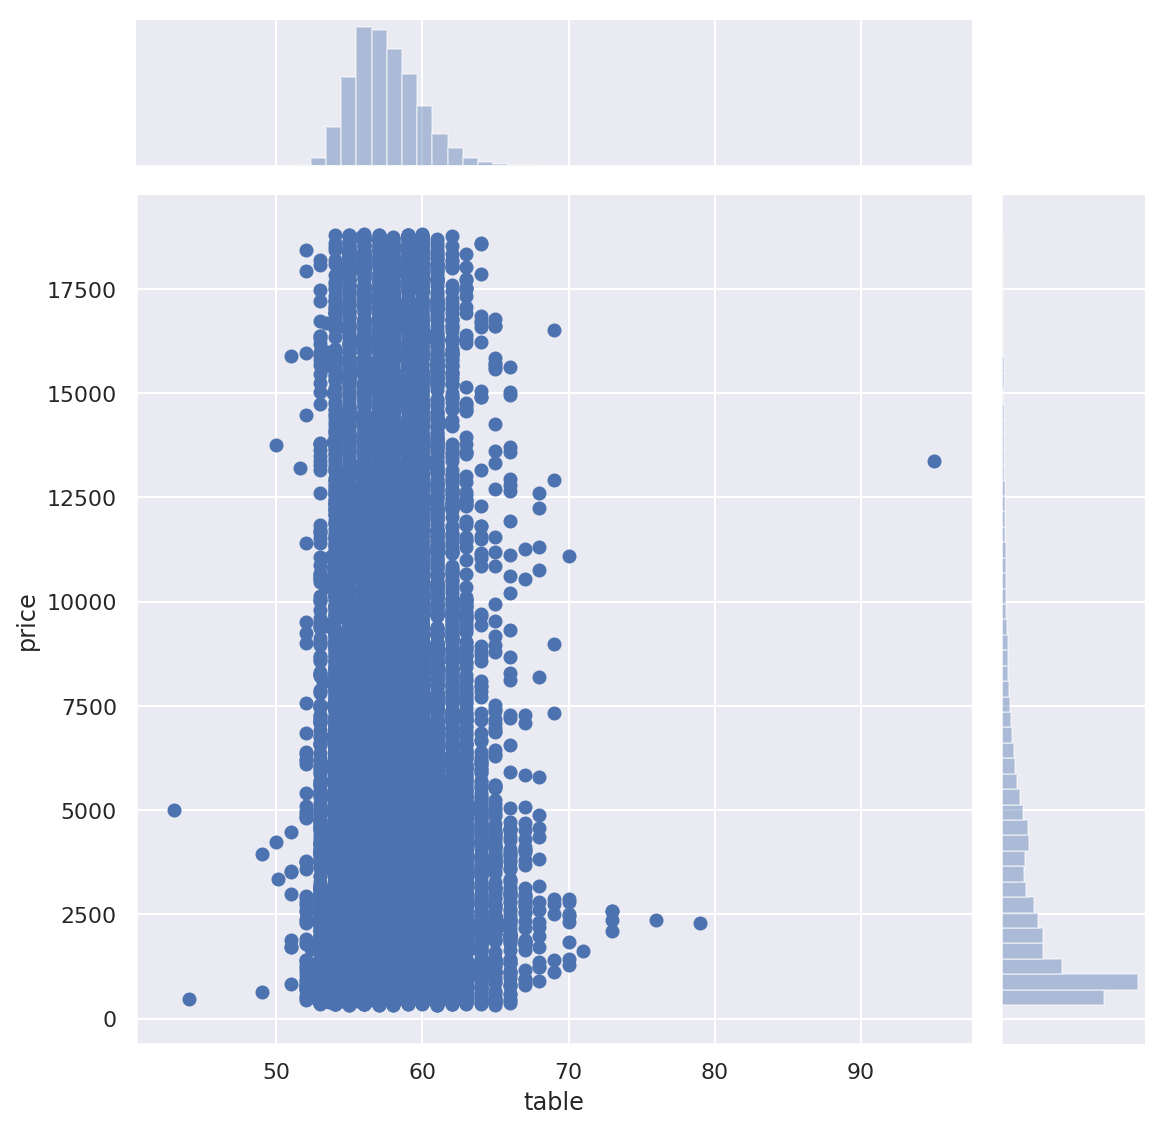

In [30]:
sns.jointplot(x='table', y='price', data=df , size=8)
print("피어슨 상관관계 : ", round(sp.stats.pearsonr(df.table, df.price)[0], 2))
plt.show()

## Volume column 만들기

In [20]:
df["volume"] = df["x"] * df["y"] * df["z"]
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,volume
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,38.202030
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,34.505856
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,38.076885
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,46.724580
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,51.917250


### x, y, z 컬럼 Drop

In [21]:
df.drop(['x','y','z'], axis=1, inplace= True)

### 볼륨대신 밀도를 사용했는지 why?
- 다이아몬드가 그 절대적인 크기에 의해 단순히 결정되는 것이 아님. 
- 같은 1캐럿 다이아라도 최저가가 몇 십만원에서 최고가 1000만원으로 형성
- 부피가 큰 것보다 그 안에 구성하고 있는 요소가 중요.  

In [22]:
# density 컬럼 추가
df["density"] = df["carat"] * 0.2 / df["volume"]

In [23]:
# volume 컬럼 삭제
df.drop(["volume"], axis=1, inplace=True)

In [24]:
df.reset_index(drop=True, inplace=True)

In [25]:
df.tail(2)

,carat,cut,color,clarity,depth,table,price,density
53918,0.86,Premium,H,SI2,61.0,58.0,2757,0.001222
53919,0.75,Ideal,D,SI2,62.2,55.0,2757,0.001204


In [26]:
df.corr()

,carat,depth,table,price,density
carat,1.000000,0.028259,0.181646,0.921592,0.206805
depth,0.028259,1.000000,-0.295733,-0.010729,0.295392
table,0.181646,-0.295733,1.000000,0.127245,0.244693
price,0.921592,-0.010729,0.127245,1.000000,0.143440
density,0.206805,0.295392,0.244693,0.143440,1.000000


### Object columns Encoding
- 모델링을 할 때 문자열 데이터는 사용할 수 없기 때문에

In [28]:
df2 = df.copy() # 복사해서 사용

## One Hot Encoding

In [29]:
df2 = pd.get_dummies(df2)

In [30]:
# 기존 데이터
df.head(2)

,carat,cut,color,clarity,depth,table,price,density
0,0.23,Ideal,E,SI2,61.5,55.0,326,0.001204
1,0.21,Premium,E,SI1,59.8,61.0,326,0.001217


In [31]:
# 인코딩 된 데이터
df2.head(2)

,carat,depth,table,price,density,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,0.001204,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,0.001217,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


### Scaling
- 다차원의 값들을 비교 분석하기 쉽게 만들어준다, 
- 자료의 오버플로우(overflow)나 언더플로우(underflow)를 방지
- 독립 변수의 공분산 행렬의 조건수를 감소시켜 최적화 과정에서의 안정성 및 수렴 속도를 향상 시킨다.

#### RobustScaler 스케일링
- 중앙값(median)과 IQR(interquartile range) 사용. 아웃라이어의 영향을 최소화

In [32]:
rb = preprocessing.RobustScaler()

In [33]:
scaled =  pd.DataFrame(rb.fit_transform(df2[['carat','depth','table', "price", 'density']]),
                       columns=['carat','depth','table', "price",'density'],index=df2.index)

In [34]:
df2[["carat", "depth", "table", "price", "density"]] = scaled[scaled.columns]

In [35]:
df2.tail(2)

,carat,depth,table,price,density,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
53918,0.250000,-0.533333,0.333333,0.081385,-0.053292,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
53919,0.078125,0.266667,-0.666667,0.081385,-0.678128,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


#### 독립, 종속 변수 분류

In [37]:
# 가설 1
"캐럿이 연관이 제일 크다."
x = df2[["carat"]]
y = df2['price']

#### train, test 데이터 분류

In [38]:
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.3, random_state=1)

## Linear Regression

In [39]:
# 모델 생성
lm = linear_model.LinearRegression()

# 학습
lm.fit(train_x, train_y)

# 예측
pred_y = lm.predict(test_x)

In [41]:
print("정확도 : ", str(round(lm.score(test_x, test_y), 3) * 100) + "%")

정확도 :  84.8%


## Random Forest

In [42]:
# 모델 생성
rf = RandomForestRegressor()

# 학습
rf.fit(train_x, train_y)

# 예측
y_pred = rf.predict(test_x)

In [43]:
print("정확도 : ", str(round(rf.score(test_x, test_y), 4) * 100) + "%")

정확도 :  86.99%


In [44]:
# 가설 2
# "밀도가 가격에 영향을 미친다."
x = df2.drop(['price'], axis=1)
y = df2['price']

#### train, test 데이터 분류

In [45]:
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.3, random_state=1)

## Linear Regression

In [46]:
# 모델 생성
lm = linear_model.LinearRegression()

# 학습
lm.fit(train_x, train_y)

# 예측
pred_y = lm.predict(test_x)

In [47]:
print("정확도 : ", str(round(lm.score(test_x, test_y), 4) * 100) + "%")

정확도 :  91.62%


## Random Forest

In [48]:
# 모델 생성
rf = RandomForestRegressor()

# 학습
rf.fit(train_x, train_y)

# 예측
y_pred = rf.predict(test_x)

In [49]:
print("정확도 : ", str(round(rf.score(test_x, test_y), 4) * 100) + "%")

정확도 :  98.1%
